<center>
    <img src="https://www.clearlyrated.com/brand-logo/talent-path" width="500" alt="cognitiveclass.ai logo"  />
</center>

In [3]:
# Code Below
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('CitiBikeData.csv')

C:\Users\Joe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,7,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,Junk
0,695,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,1,junk1
1,693,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,1,junk2
2,2059,41426,41426.02431,406,Hicks St & Montague St,406,Hicks St & Montague St,19599,Customer,?,0,random
3,123,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,1,junk3
4,1521,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,1,junk4
5,2028,41426.00069,41426.02431,485,W 37 St & 5 Ave,406,Hicks St & Montague St,18445,Customer,?,0,random
6,2057,41426.00139,41426.025,285,Broadway & E 14 St,532,S 5 Pl & S 5 St,15693,Subscriber,1991,1,random
7,369,41426.00208,?,?,?,?,?,?,?,?,?,?
8,1829,41426.00208,41426.02361,265,Stanton St & Chrystie St,436,Hancock St & Bedford Ave,15234,Subscriber,1984,1,junk6
9,829,41426.00278,41426.0125,404,9 Ave & W 14 St,303,Mercer St & Spring St,16400,Subscriber,1987,1,random


In [6]:
df.shape

(577716, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577716 entries, 0 to 577715
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   tripduration        577716 non-null  object
 1   starttime           577716 non-null  object
 2   stoptime            577716 non-null  object
 3   start station id    577716 non-null  object
 4   start station name  577716 non-null  object
 5   end station id      577716 non-null  object
 6   end station name    577716 non-null  object
 7   bikeid              577716 non-null  object
 8   usertype            577716 non-null  object
 9   birth year          577716 non-null  object
 10  gender              577716 non-null  object
 11  Junk                577716 non-null  object
dtypes: object(12)
memory usage: 52.9+ MB


In [8]:
df.isnull().sum()

tripduration          0
starttime             0
stoptime              0
start station id      0
start station name    0
end station id        0
end station name      0
bikeid                0
usertype              0
birth year            0
gender                0
Junk                  0
dtype: int64

In [10]:
df.drop(columns={'Junk'}, axis=1, inplace=True)
df

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender
0,695,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,1
1,693,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,1
2,2059,41426,41426.02431,406,Hicks St & Montague St,406,Hicks St & Montague St,19599,Customer,?,0
3,123,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,1
4,1521,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,1
...,...,...,...,...,...,...,...,...,...,...,...
577711,925,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,1
577712,279,41455.99931,41456.00278,116,W 17 St & 8 Ave,494,W 26 St & 8 Ave,19411,Customer,?,0
577713,161,41455.99931,41456.00139,443,Bedford Ave & S 9 St,282,Kent Ave & S 11 St,18910,Subscriber,1972,2
577714,909,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,16108,Customer,?,0


In [11]:
df['birth year'].value_counts()

?       240336
1983     16274
1985     15077
1981     14903
1982     14427
         ...  
1920         5
1935         5
1927         3
1930         2
1929         1
Name: birth year, Length: 77, dtype: int64

In [12]:
df[df['birth year'] == '?']['usertype'].value_counts()

Customer      240319
?                 15
Subscriber         2
Name: usertype, dtype: int64

In [13]:
df[df['birth year'] != '?']['usertype'].value_counts()

Subscriber    337380
Name: usertype, dtype: int64

In [14]:
df.replace('?', np.nan, inplace=True)

In [15]:
df = df.dropna(subset=['tripduration','starttime', 'stoptime' ], thresh=2)
df.shape

(577703, 11)

In [16]:
df = df.dropna(subset=df.columns, thresh=10)
df.shape

(559642, 11)

In [17]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
end station id             0
end station name           0
bikeid                     0
usertype                   0
birth year            232803
gender                     0
dtype: int64

In [18]:
def genderFix(g):
    g = int(g)
    if(g==1):
        return 'male'
    elif(g==2):
        return 'female'
    else:
        return 'unknown'

In [19]:
df['gender'] = df['gender'].apply(genderFix)
df

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender
0,695,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,male
1,693,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,male
2,2059,41426,41426.02431,406,Hicks St & Montague St,406,Hicks St & Montague St,19599,Customer,NaN,unknown
3,123,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,male
4,1521,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,male
...,...,...,...,...,...,...,...,...,...,...,...
577711,925,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,male
577712,279,41455.99931,41456.00278,116,W 17 St & 8 Ave,494,W 26 St & 8 Ave,19411,Customer,NaN,unknown
577713,161,41455.99931,41456.00139,443,Bedford Ave & S 9 St,282,Kent Ave & S 11 St,18910,Subscriber,1972,female
577714,909,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,16108,Customer,NaN,unknown


In [20]:
def findAge(birthyear):
    birthyear = float(birthyear)
    if(birthyear==np.nan):
        return np.nan
    else:
        return round((2021.0-birthyear), 0)

In [21]:
df['Age'] = df['birth year'].apply(findAge)
df

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,Age
0,695,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,male,38.0
1,693,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,male,37.0
2,2059,41426,41426.02431,406,Hicks St & Montague St,406,Hicks St & Montague St,19599,Customer,NaN,unknown,NaN
3,123,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,male,61.0
4,1521,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,male,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
577711,925,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,male,57.0
577712,279,41455.99931,41456.00278,116,W 17 St & 8 Ave,494,W 26 St & 8 Ave,19411,Customer,NaN,unknown,NaN
577713,161,41455.99931,41456.00139,443,Bedford Ave & S 9 St,282,Kent Ave & S 11 St,18910,Subscriber,1972,female,49.0
577714,909,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,16108,Customer,NaN,unknown,NaN


In [22]:
#df['Age'].agg(['mode', 'mean'])

In [23]:
#I hope this still counts as 1 line
print(df['Age'].agg(['mode']), df['Age'].agg(['mean', 'max', 'min']), sep='\n')

   mode
0  38.0
mean     46.358222
max     122.000000
min      24.000000
Name: Age, dtype: float64


In [24]:
#filter out anyrows where age is greater than 105
df[df['Age']>=105 ]['Age'].count()

138

In [25]:
df['Age'].value_counts(dropna=False)

NaN      232803
38.0      15698
36.0      14589
40.0      14465
39.0      13971
          ...  
101.0         5
86.0          4
94.0          3
91.0          2
92.0          1
Name: Age, Length: 77, dtype: int64

I was going to make the age filter 90, but I saw this article(https://www.cyclist.co.uk/news/2771/robert-marchand-105-recognised-as-the-world-s-oldest-competitive-cyclist) showing the oldest competitive cyclest to be 105. So people cycling past 100 years old aren't impossible.


In [26]:
#this doesnt work, removes nan's
new_df = df[(df['Age']<=105) | (df['Age'] is np.nan)]
new_df

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,Age
0,695,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,male,38.0
1,693,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,male,37.0
3,123,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,male,61.0
4,1521,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,male,38.0
6,2057,41426.00139,41426.025,285,Broadway & E 14 St,532,S 5 Pl & S 5 St,15693,Subscriber,1991,male,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
577700,436,41455.99861,41456.00347,161,LaGuardia Pl & W 3 St,403,E 2 St & 2 Ave,19454,Subscriber,1982,male,39.0
577702,185,41455.99792,41456.0,323,Lawrence St & Willoughby St,293,Lafayette St & E 8 St,16746,Subscriber,1982,male,39.0
577703,595,41455.99861,41456.00556,360,William St & Pine St,329,Greenwich St & North Moore St,19290,Subscriber,1985,male,36.0
577711,925,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,male,57.0


In [27]:
#instead lets change all nan values to -1 then remove all values over 105 all
df['Age'].replace(np.nan, -1, inplace=True)

In [28]:
df['Age'].value_counts(dropna=False)

-1.0      232803
 38.0      15698
 36.0      14589
 40.0      14465
 39.0      13971
           ...  
 101.0         5
 86.0          4
 94.0          3
 91.0          2
 92.0          1
Name: Age, Length: 77, dtype: int64

In [29]:
df

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,Age
0,695,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,male,38.0
1,693,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,male,37.0
2,2059,41426,41426.02431,406,Hicks St & Montague St,406,Hicks St & Montague St,19599,Customer,NaN,unknown,-1.0
3,123,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,male,61.0
4,1521,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,male,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
577711,925,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,male,57.0
577712,279,41455.99931,41456.00278,116,W 17 St & 8 Ave,494,W 26 St & 8 Ave,19411,Customer,NaN,unknown,-1.0
577713,161,41455.99931,41456.00139,443,Bedford Ave & S 9 St,282,Kent Ave & S 11 St,18910,Subscriber,1972,female,49.0
577714,909,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,16108,Customer,NaN,unknown,-1.0


In [30]:
#filter out everything over 105 and then replace np.nans back
df = df[(df['Age']<=105)]
df

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,Age
0,695,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,male,38.0
1,693,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,male,37.0
2,2059,41426,41426.02431,406,Hicks St & Montague St,406,Hicks St & Montague St,19599,Customer,NaN,unknown,-1.0
3,123,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,male,61.0
4,1521,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,male,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
577711,925,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,male,57.0
577712,279,41455.99931,41456.00278,116,W 17 St & 8 Ave,494,W 26 St & 8 Ave,19411,Customer,NaN,unknown,-1.0
577713,161,41455.99931,41456.00139,443,Bedford Ave & S 9 St,282,Kent Ave & S 11 St,18910,Subscriber,1972,female,49.0
577714,909,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,16108,Customer,NaN,unknown,-1.0


In [31]:
df['Age'].replace(-1, np.nan, inplace=True)

C:\Users\Joe\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [32]:
df['Age'].value_counts(dropna=False)

NaN      232803
38.0      15698
36.0      14589
40.0      14465
39.0      13971
          ...  
101.0         5
86.0          4
94.0          3
91.0          2
92.0          1
Name: Age, Length: 73, dtype: int64

In [33]:
df

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,Age
0,695,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,male,38.0
1,693,41426,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,male,37.0
2,2059,41426,41426.02431,406,Hicks St & Montague St,406,Hicks St & Montague St,19599,Customer,NaN,unknown,NaN
3,123,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,male,61.0
4,1521,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,male,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
577711,925,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,male,57.0
577712,279,41455.99931,41456.00278,116,W 17 St & 8 Ave,494,W 26 St & 8 Ave,19411,Customer,NaN,unknown,NaN
577713,161,41455.99931,41456.00139,443,Bedford Ave & S 9 St,282,Kent Ave & S 11 St,18910,Subscriber,1972,female,49.0
577714,909,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,16108,Customer,NaN,unknown,NaN


In [34]:
#change trip duration, starttime, stoptime to floats
df[["tripduration", "starttime", "stoptime"]] = df[["tripduration", "starttime", "stoptime"]].astype("float")
df.info()

C:\Users\Joe\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 559504 entries, 0 to 577715
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tripduration        559504 non-null  float64
 1   starttime           559504 non-null  float64
 2   stoptime            559504 non-null  float64
 3   start station id    559504 non-null  object 
 4   start station name  559504 non-null  object 
 5   end station id      559504 non-null  object 
 6   end station name    559504 non-null  object 
 7   bikeid              559504 non-null  object 
 8   usertype            559504 non-null  object 
 9   birth year          326701 non-null  object 
 10  gender              559504 non-null  object 
 11  Age                 326701 non-null  float64
dtypes: float64(4), object(8)
memory usage: 55.5+ MB


In [35]:
#change station ids(start and end), bikeid, birthyear and age to ints
df[["start station id", "end station id", "bikeid", "birth year", "Age" ]] = df[["start station id", "end station id", "bikeid", "birth year", "Age" ]].astype(float).astype("Int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559504 entries, 0 to 577715
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tripduration        559504 non-null  float64
 1   starttime           559504 non-null  float64
 2   stoptime            559504 non-null  float64
 3   start station id    559504 non-null  Int64  
 4   start station name  559504 non-null  object 
 5   end station id      559504 non-null  Int64  
 6   end station name    559504 non-null  object 
 7   bikeid              559504 non-null  Int64  
 8   usertype            559504 non-null  object 
 9   birth year          326701 non-null  Int64  
 10  gender              559504 non-null  object 
 11  Age                 326701 non-null  Int64  
dtypes: Int64(5), float64(3), object(4)
memory usage: 58.2+ MB


In [36]:
df

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,Age
0,695.0,41426.00000,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,male,38
1,693.0,41426.00000,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,male,37
2,2059.0,41426.00000,41426.02431,406,Hicks St & Montague St,406,Hicks St & Montague St,19599,Customer,<NA>,unknown,<NA>
3,123.0,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,male,61
4,1521.0,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,male,38
...,...,...,...,...,...,...,...,...,...,...,...,...
577711,925.0,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,male,57
577712,279.0,41455.99931,41456.00278,116,W 17 St & 8 Ave,494,W 26 St & 8 Ave,19411,Customer,<NA>,unknown,<NA>
577713,161.0,41455.99931,41456.00139,443,Bedford Ave & S 9 St,282,Kent Ave & S 11 St,18910,Subscriber,1972,female,49
577714,909.0,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,16108,Customer,<NA>,unknown,<NA>


In [37]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
end station id             0
end station name           0
bikeid                     0
usertype                   0
birth year            232803
gender                     0
Age                   232803
dtype: int64

In [38]:
df.reset_index(inplace=True)
df

,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,Age
0,0,695.0,41426.00000,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,male,38
1,1,693.0,41426.00000,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,male,37
2,2,2059.0,41426.00000,41426.02431,406,Hicks St & Montague St,406,Hicks St & Montague St,19599,Customer,<NA>,unknown,<NA>
3,3,123.0,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,male,61
4,4,1521.0,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,male,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559499,577711,925.0,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,male,57
559500,577712,279.0,41455.99931,41456.00278,116,W 17 St & 8 Ave,494,W 26 St & 8 Ave,19411,Customer,<NA>,unknown,<NA>
559501,577713,161.0,41455.99931,41456.00139,443,Bedford Ave & S 9 St,282,Kent Ave & S 11 St,18910,Subscriber,1972,female,49
559502,577714,909.0,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,16108,Customer,<NA>,unknown,<NA>


In [39]:
df.drop(columns={'index'}, axis=1, inplace=True)
df

C:\Users\Joe\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,Age
0,695.0,41426.00000,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,male,38
1,693.0,41426.00000,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,male,37
2,2059.0,41426.00000,41426.02431,406,Hicks St & Montague St,406,Hicks St & Montague St,19599,Customer,<NA>,unknown,<NA>
3,123.0,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,male,61
4,1521.0,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,male,38
...,...,...,...,...,...,...,...,...,...,...,...,...
559499,925.0,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,male,57
559500,279.0,41455.99931,41456.00278,116,W 17 St & 8 Ave,494,W 26 St & 8 Ave,19411,Customer,<NA>,unknown,<NA>
559501,161.0,41455.99931,41456.00139,443,Bedford Ave & S 9 St,282,Kent Ave & S 11 St,18910,Subscriber,1972,female,49
559502,909.0,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,16108,Customer,<NA>,unknown,<NA>


In [40]:
#want to show age vs trip duration, dropping rows without an age/birthyear
df_no_nulls = df.dropna()
df_no_nulls

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,Age
0,695.0,41426.00000,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,19678,Subscriber,1983,male,38
1,693.0,41426.00000,41426.00764,444,Broadway & W 24 St,434,9 Ave & W 18 St,16649,Subscriber,1984,male,37
3,123.0,41426.00069,41426.00208,475,E 15 St & Irving Pl,262,Washington Park,16352,Subscriber,1960,male,61
4,1521.0,41426.00069,41426.01806,2008,Little West St & 1 Pl,310,State St & Smith St,15567,Subscriber,1983,male,38
6,2057.0,41426.00139,41426.02500,285,Broadway & E 14 St,532,S 5 Pl & S 5 St,15693,Subscriber,1991,male,30
...,...,...,...,...,...,...,...,...,...,...,...,...
559488,436.0,41455.99861,41456.00347,161,LaGuardia Pl & W 3 St,403,E 2 St & 2 Ave,19454,Subscriber,1982,male,39
559490,185.0,41455.99792,41456.00000,323,Lawrence St & Willoughby St,293,Lafayette St & E 8 St,16746,Subscriber,1982,male,39
559491,595.0,41455.99861,41456.00556,360,William St & Pine St,329,Greenwich St & North Moore St,19290,Subscriber,1985,male,36
559499,925.0,41455.99931,41456.00972,509,9 Ave & W 22 St,462,W 22 St & 10 Ave,15250,Subscriber,1964,male,57


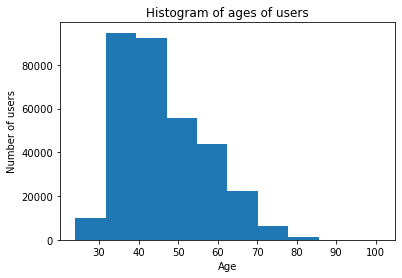

In [41]:
df_no_nulls.hist(['Age'], bins=10)
plt.xlabel("Age")
plt.ylabel("Number of users")
plt.title("Histogram of ages of users")
plt.grid(False)
plt.show()

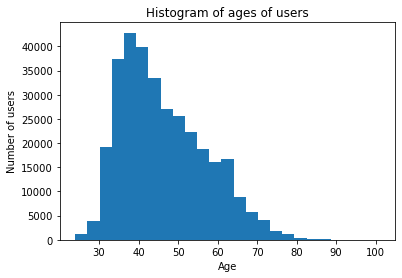

In [42]:
df_no_nulls.hist(['Age'], bins=25)
plt.xlabel("Age")
plt.ylabel("Number of users")
plt.title("Histogram of ages of users")
plt.grid(False)
plt.show()

In [43]:
def categorizeAges(age):
    age = int(age)
    if(age <= 33):
        return 'Young'
    elif(age>33 and age <= 66):
        return 'Middle'
    elif(age>66 and age <= 105):
        return 'Old'

In [44]:
df_no_nulls['Age Category'] = df_no_nulls['Age'].apply(categorizeAges)
df_no_nulls['Age Category'].value_counts(normalize=True).mul(100).round(2)

<ipython-input-44-932098eb11da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nulls['Age Category'] = df_no_nulls['Age'].apply(categorizeAges)


Middle    87.66
Young      7.44
Old        4.91
Name: Age Category, dtype: float64

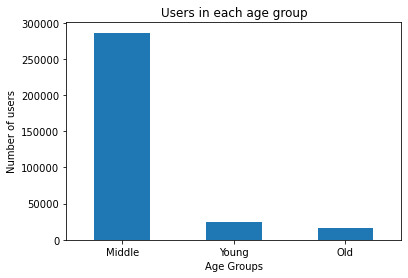

In [64]:
df_no_nulls['Age Category'].value_counts().plot(kind='bar')
plt.xlabel("Age Groups")
plt.ylabel("Number of users")
plt.title("Users in each age group")
plt.xticks(rotation=0)
plt.show()

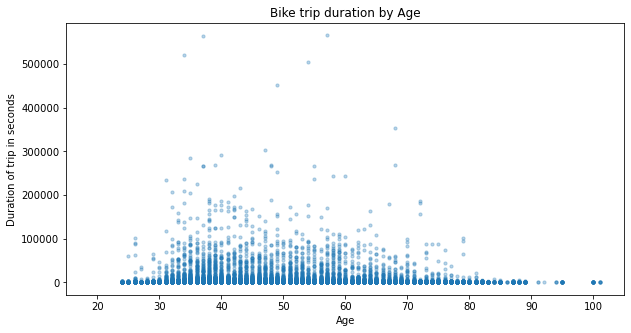

In [46]:
age_scatter = df_no_nulls.plot.scatter('Age', 'tripduration', s=10, figsize=(10, 5), alpha=0.3)

age_scatter.set_xlim(15,105)
plt.xlabel('Age')
plt.ylabel('Duration of trip in seconds')
plt.title('Bike trip duration by Age')

plt.show()

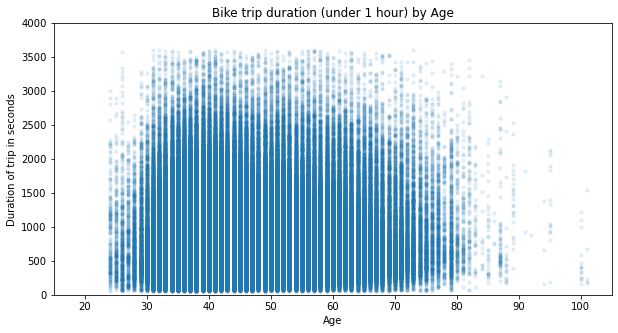

In [65]:
df_time_limit = df_no_nulls[df_no_nulls['tripduration'] <= 3600]

age_scatter_limited = df_time_limit.plot.scatter('Age', 'tripduration', s=10, figsize=(10, 5), alpha=0.1)

age_scatter_limited.set_xlim(15,105)
age_scatter_limited.set_ylim(0,4000)
plt.xlabel('Age')
plt.ylabel('Duration of trip in seconds')
plt.title('Bike trip duration (under 1 hour) by Age')

plt.show()

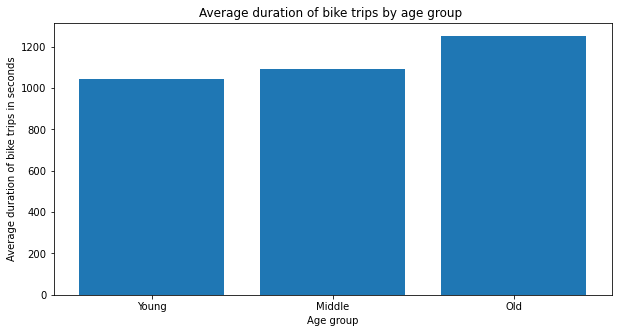

In [61]:
youngAvg = df_no_nulls[df_no_nulls['Age Category']=='Young']['tripduration'].mean()
middleAvg = df_no_nulls[df_no_nulls['Age Category']=='Middle']['tripduration'].mean()
oldAvg = df_no_nulls[df_no_nulls['Age Category']=='Old']['tripduration'].mean()

data = {'Young':youngAvg, 'Middle': middleAvg, 'Old':oldAvg}
keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values)
 
plt.xlabel("Age group")
plt.ylabel("Average duration of bike trips in seconds")
plt.title("Average duration of bike trips by age group ")
plt.show()

In [58]:
print("Average duration of rides")
print(f'Young(1-33): {round(youngAvg, 2)}')
print(f'Middle(33-66): {round(middleAvg, 2)}')
print(f'Old(66+): {round(oldAvg, 2)}')

Average duration of rides
Young(1-33): 1041.71
Middle(33-66): 1094.42
Old(66+): 1252.0
